# Data processing notebook for SSRL BL2-1
* Routines based on Kevin Stone's: https://github.com/khstone/BL21-Pilatus
* Clone this repo in processing folder (can delete example data in Oct2022)
* Run with pilatus_python3.py in the same folder 

# Calibration
* Clone this repo in processing folder (can delete example data in Oct2022)
* Run with pilatus_python3.py in the same folder 
* Define calibration file location and direct beam pixel
* Calculate sample-detector distance with direct beam rotation frames
* Define pixel map for integration

#### Edit this cell to specify calibration file locations

In [1]:
# Calibration file locations
data_path = "./Oct2022/images/"
calib_name = "b_stone_directbeam20221028_scan1_"
csv_path = "./Oct2022/"
csv_name = "directbeam20221028_scan1.csv"

#### Run calibration routines - usually don't need to edit this cell

337 90


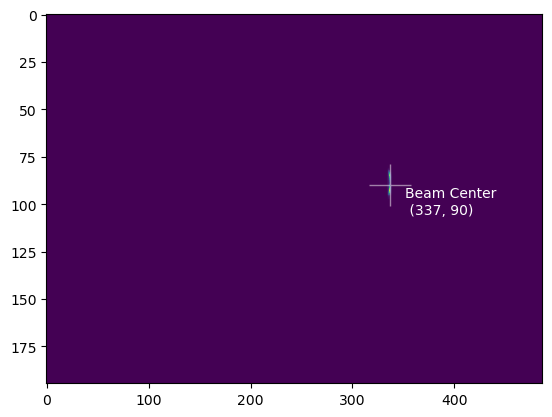

100%|██████████| 100/100 [00:00<00:00, 562.40it/s]


Sample to detector distance 4107.92 pixels or 706.56 mm


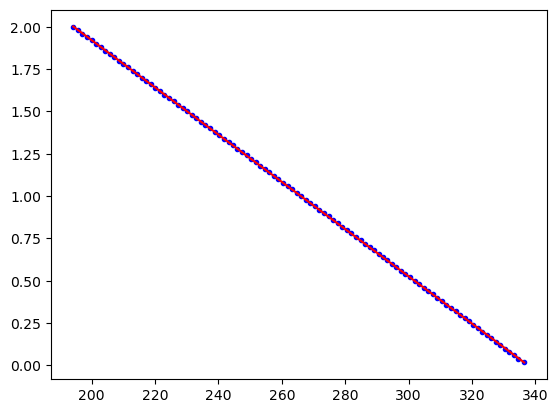

In [2]:
# for interactive plots use %matplotlib notebook
# %matplotlib widget
# %matplotlib notebook

from pilatus_python3 import *

# Get beam center
# plot=True will plot fitting results for a sanity check
db_pixel = find_directbeam(data_path, calib_name, plot=True)
# db_pixel = [265, 89]  # Can also specify manually

# Calculate the sample-detector distance
# If pix_size not specified, default pix_size = 172.0 (in um) is used
# plot=True will plot fitting results for a sanity check
det_R, det_R_mm = directbeam_calibration(csv_path, csv_name, data_path, calib_name, db_pixel, plot=True)

xyz_map = make_pixel_map(det_R, db_pixel) # pixel map for integration

# Integration
* Specify file locations and parameters for integration
* Run integration

In [3]:
# Information for scan to be integrated goes here
user = "b_stone"
stepsize = 0.01

# Root folder containing ./images/ and ./scans/ folders
# folder = "./Oct2022/2022Oct28_1135/"
folder = "./Oct2022/2022Oct28_1212/"

# spec_name = "BL21Robot_0310-2022-10-28-1136"
spec_name = "BL21Robot_0001-2022-10-28-1212"

scan_number = 2


Reading SPEC file ./Oct2022/2022Oct28_1212/scans/BL21Robot_0001-2022-10-28-1212


100%|██████████| 111/111 [00:01<00:00, 99.42it/s] 


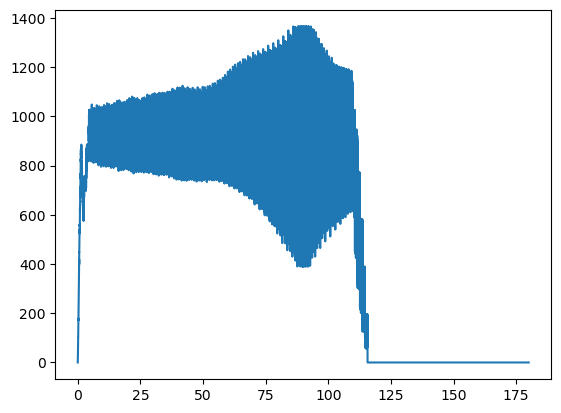

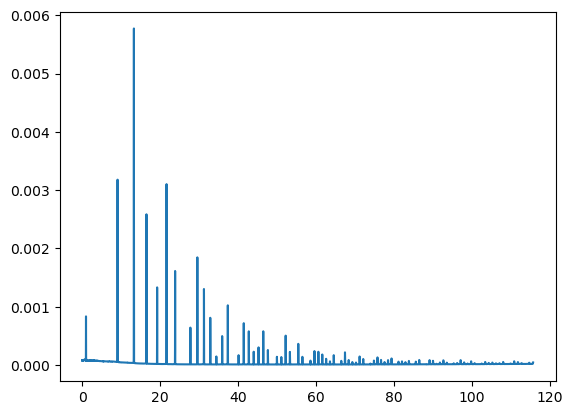

In [4]:
# Default multiplier is 1000000.0, specify mult = ... for a different value
integrate(scan_number, folder, user, spec_name, stepsize, xyz_map)